# Electronegative Impurities Simulations

Simulations of the electronegative contaminent control 

In [1]:
import elec_neg_functions as enf
import numpy as np
import matplotlib.pyplot as plt

# Constants
M_nEXO = 5000  # in kg, LXe mass
p_LXe = 5.5e-3  # in kg/liter, LXe density

In [4]:
# Constants
n0 = 1  # in ppb, initial impurity concentration
n_p= 0.01  # in ppb, purifier output impurity concentration
F = 200/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0  # purification efficiency
alpha = 0.3*1e-3  # in s, EXO-200 value, field dependant factor

num_seconds = 60*24*60*60  # total seconds in the number of days
seconds = np.arange(0, num_seconds+1)


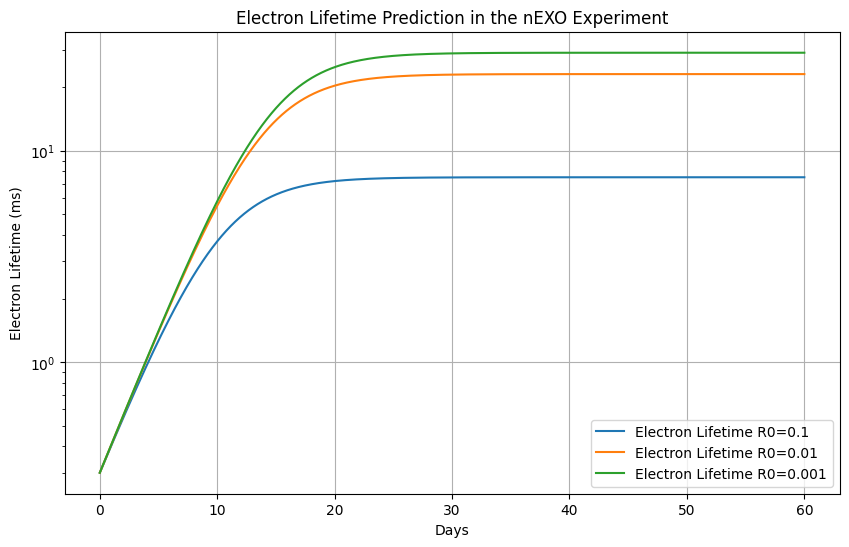

In [20]:

R0_values = [0.1, 0.01, 0.001] # in ppb liter/sec, total out-diffusion rate

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
for R0 in R0_values:
    electron_lifetimes = [enf.tau(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p)*1e3 for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'Electron Lifetime R0={R0}')

# Configuring the plot's settings
plt.title('Electron Lifetime Prediction in the nEXO Experiment')
plt.xlabel('Days')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')  # Logarithmic scale on the y-axis, as electron lifetimes change exponentially
plt.legend()  # Display legend
plt.grid(True)  # Display grid for better readability

# Show the plot
plt.show()

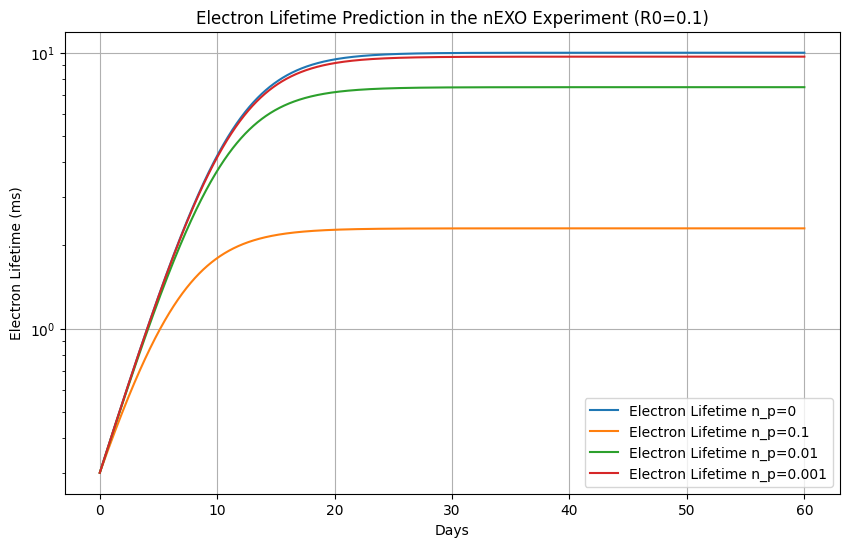

In [5]:
R0=0.1 # in ppb liter/sec, total out-diffusion rate
n_p_values = [0, 0.1, 0.01, 0.001] # in ppb liter/sec, total out-diffusion rate

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
for n_p in n_p_values:
    electron_lifetimes = [enf.tau(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p)*1e3 for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'Electron Lifetime n_p={n_p}')

# Configuring the plot's settings
plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (R0={R0})')
plt.xlabel('Days')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')  # Logarithmic scale on the y-axis, as electron lifetimes change exponentially
plt.legend()  # Display legend
plt.grid(True)  # Display grid for better readability

# Show the plot
plt.show()

## XPM measurement fits

In [2]:
# Constants
M_XPM=1.53 # in Kg, LXe mass
C_el=300 # in ppb/μs

Re-alalyzing XPM Measurement. Data from "control3" (empty XPM) in April (run start 2-10-17)

From P.C. Rowson et al., Xenon Purity Monitor at SLAC

In [ ]:
# Constants for "control3" measurements
n_p= 0.0  # in ppb, purifier output impurity concentration
F = 1.4/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0; eta_error=0.3  # purification efficiency
alpha = 0.3*1e-3  # in s, EXO-200 value, field dependant factor

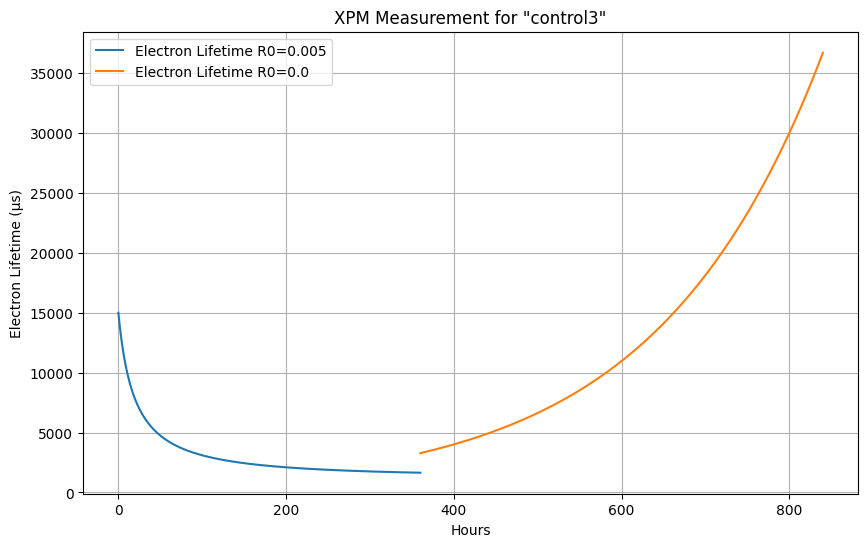

In [11]:
# Constants
R0_values = 5.0e-3; R0_error=1.0e-3 # in ppb liter/sec, total out-diffusion rate
n0 = 0.02; n0_error=0.02  # in ppb, initial impurity concentration
seconds = np.arange(0, 6*60*60+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.tau(sec, M_XPM, p_LXe, n0, F, eta, R0_values, alpha, n_p)*1e6 for sec in seconds]
plt.plot(seconds / 60, electron_lifetimes, label=f'Electron Lifetime R0={R0_values}')

# Constants
R0_values = 0.0e-4; R0_error=7.4e-4 # in ppb liter/sec, total out-diffusion rate
n0 = 0.56; n0_errors=0.12  # in ppb, initial impurity concentration
seconds = np.arange(6*60*60+1, 14*60*60+1)

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.tau(sec, M_XPM, p_LXe, n0, F, eta, R0_values, alpha, n_p)*1e6 for sec in seconds]
plt.plot(seconds / 60, electron_lifetimes, label=f'Electron Lifetime R0={R0_values}')

# Configuring the plot's settings
plt.title('XPM Measurement for "control3"')
plt.xlabel('Hours')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()  # Display legend
plt.grid(True)  # Display grid for better readability

# Show the plot
plt.show()

Exemple with Torlon

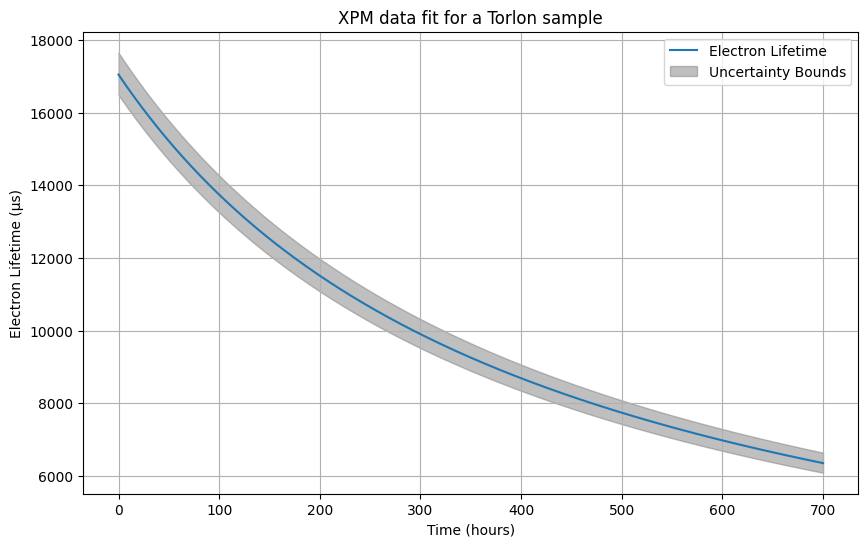

In [9]:
# Constants
n0=0.0176; n0_error=6e-4
R0=3.27e-6; R0_error=0.16e-6

# Time range
second = np.arange(0, (700*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds, then plot
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_tau_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting the main line
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')

# Adding the uncertainty area
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
plt.title('XPM data fit for a Torlon sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Exemple with Ultem.

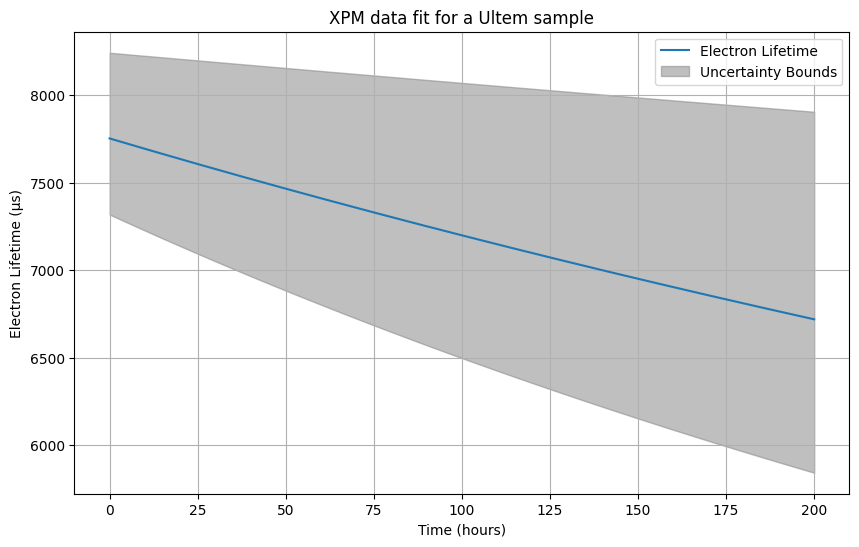

In [11]:

# Constants
n0=0.0387; n0_error=2.3e-3
R0=2.3e-6; R0_error=1.7e-6

# Time range
second = np.arange(0, (200*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds, then plot
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_tau_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting the main line
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')

# Adding the uncertainty area
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
plt.title('XPM data fit for a Ultem sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()